# Einleitung
* Hello
* World

In [5]:
import pandas as pd

git_blame = pd.read_csv("../dataset/linux_blame_log.csv")
git_blame.head()

,path,author,timestamp,line
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,1
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,2
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,3
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,1253753175000000000,4
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,1448528085000000000,5


In [7]:
git_blame.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665947 entries, 0 to 5665946
Data columns (total 4 columns):
path         object
author       object
timestamp    int64
line         int64
dtypes: int64(2), object(2)
memory usage: 971.8 MB


In [9]:
git_blame.path = pd.Categorical(git_blame.path)
git_blame.author = pd.Categorical(git_blame.author)
git_blame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665947 entries, 0 to 5665946
Data columns (total 4 columns):
path         category
author       category
timestamp    int64
line         int64
dtypes: category(2), int64(2)
memory usage: 108.7 MB


In [16]:
git_blame.timestamp = pd.to_datetime(git_blame.timestamp)
git_blame.head()

,path,author,timestamp,line
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5


In [20]:
git_blame.author.value_counts();

In [22]:
six_months_ago = pd.Timestamp('now') - pd.DateOffset(months=6)
six_months_ago

Timestamp('2017-10-25 12:18:37.726169')

In [25]:
git_blame['knowing'] = git_blame.timestamp >= six_months_ago
git_blame.head()

,path,author,timestamp,line,knowing
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1,False
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2,False
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3,False
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4,False
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5,False


In [29]:
git_blame[git_blame.knowing].author.value_counts();

# No-Go-Areas

In [31]:
git_blame.path.value_counts().head(1)

drivers/media/dvb-frontends/drx39xyj/drxj_map.h    15055
Name: path, dtype: int64

In [32]:
git_blame['component'] = git_blame.path.str.split("/").str[:2].str.join(":")
git_blame.head()

,path,author,timestamp,line,knowing,component
0,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,1,False,drivers:scsi
1,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,2,False,drivers:scsi
2,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,3,False,drivers:scsi
3,drivers/scsi/bfa/bfad_drv.h,Jing Huang,2009-09-24 00:46:15,4,False,drivers:scsi
4,drivers/scsi/bfa/bfad_drv.h,Anil Gurumurthy,2015-11-26 08:54:45,5,False,drivers:scsi


In [35]:
components = git_blame.groupby('component').knowing.mean().sort_values()
components.head()

component
arch:arc           0.0
include:media      0.0
include:linux      0.0
include:asm-arm    0.0
drivers:xen        0.0
Name: knowing, dtype: float64

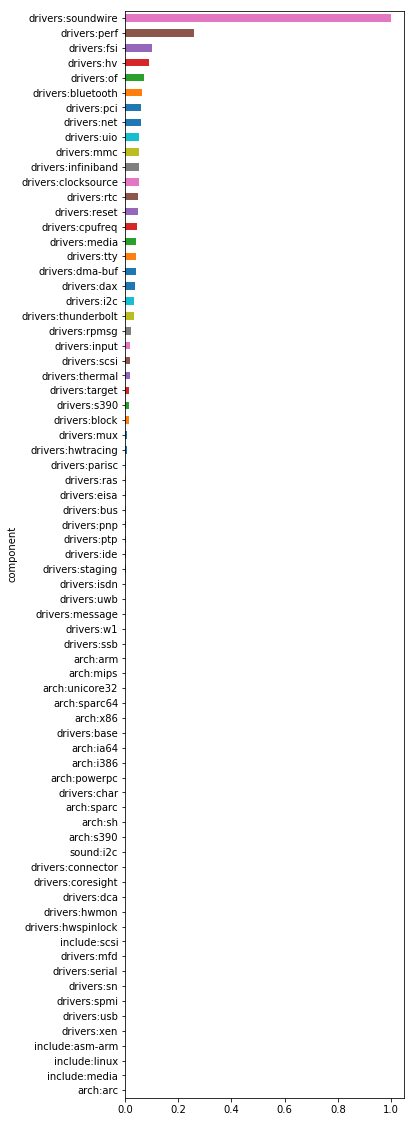

In [37]:
%matplotlib inline
components.plot.barh(figsize=[5,20])